# Examples from *Python for Data Science Handbook*
Book can be purchased from [O'Reilly website](http://shop.oreilly.com/product/0636920034919.do); more notebooks available on [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Introducing scikit-learn

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


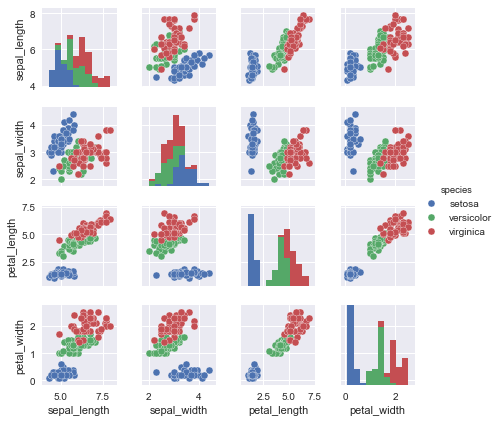

In [3]:
sns.pairplot(iris, hue = 'species', size = 1.5);

In [4]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

### Basics of the API

Most commonly, the steps in using the Scikit-Learn **estimator** API are as follows (we will step through a handful of detailed examples in the sections that follow):
1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
• For supervised learning, often we predict labels for unknown data using the predict() method.
• For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

### Supervised learning: Regression example

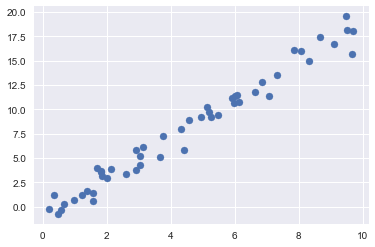

In [6]:
# create sample data
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

In [7]:
# choose model class
from sklearn.linear_model import LinearRegression

In [8]:
# choose hyperparameters (instantiate model)
model = LinearRegression(fit_intercept=True)

In [9]:
# arrange data in feature matrix and target vector
X = x[:, np.newaxis]
X.shape # X should be a a matrix of size [n_samples, n_features]

# y is already in correct form (a length-n_samples array)

(50, 1)

In [10]:
# fit model to the data
model.fit(X,y)
print(model)

# (optional) print model details
print('Model coeff: ', model.coef_)
print('Model intercept: ', model.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Model coeff:  [ 1.9776566]
Model intercept:  -0.903310725531


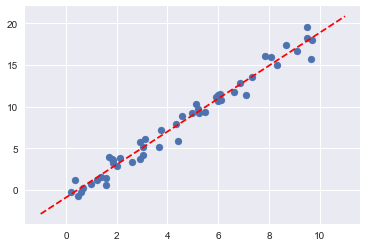

In [11]:
# predict labels for unknown data
# first, create sample data
xfit = np.linspace(-1,11)
Xfit = xfit[:, np.newaxis]

# predict labels
yfit = model.predict(Xfit)

# plot results
plt.scatter(x,y)
plt.plot(xfit, yfit, 'r--');

### Supervised learning: Classification example

In [62]:
# split data into training and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state = 1)

# choose model class
from sklearn.naive_bayes import GaussianNB

# instantiate class
model = GaussianNB()

# fit model to data
model.fit(X_train, y_train)

# predict new labels
y_model = model.predict(X_test)

# score model performance
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.97368421052631582

### Unsupervised learning: Iris dimensionality

In [13]:
# choose model class
from sklearn.decomposition import PCA

# instantiate model with hyperparameters
model = PCA(n_components = 2)

# fit model to data; y is not specified!
model.fit(X_iris)

# transform data in two dimensions
X_2D = model.transform(X_iris)

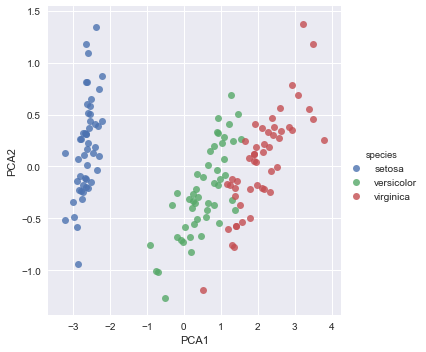

In [14]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', fit_reg = False);

### Unsupervised learning: Iris clustering

In [15]:
# choose model class
from sklearn.mixture import GaussianMixture

# instantiate model with hyperparameters
model = GaussianMixture(n_components = 3)

# fit to data; y is not specified!
model.fit(X_iris)

# determine cluster labels
y_gmm = model.predict(X_iris)

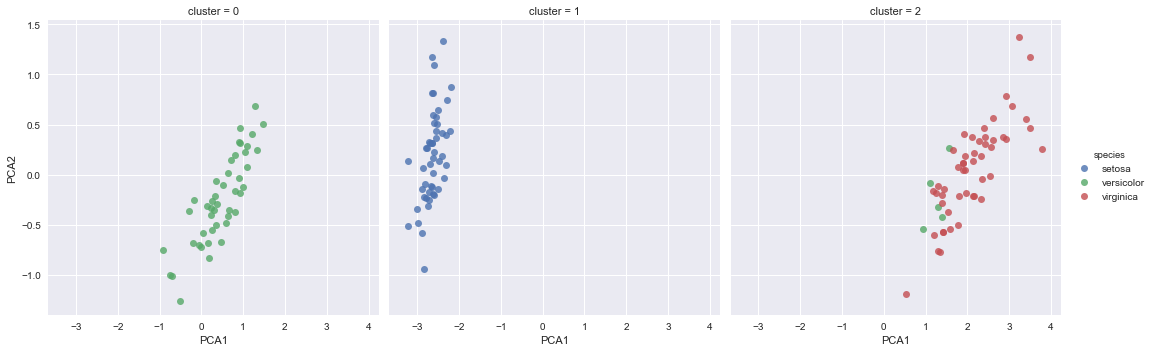

In [16]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', fit_reg = False, col = 'cluster');

## Hyperparameters and model validation

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 1)

### Option 1: Holdout sets

In [18]:
# create training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = 0.5, random_state = 0)

# train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# score model
accuracy_score(y_test, y_pred)

0.90666666666666662

### Option 2: Cross-validation

In [19]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X_iris, y_iris, cv = 5)
scores.mean()

0.95999999999999996

### Option 3: Leave One Out
Special case of cross validation using all possible data splits (`cv = n_samples`)

In [20]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X_iris, y_iris, cv = LeaveOneOut(len(X_iris)))
scores.mean()

0.95999999999999996

### Model validation: Grid Search

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# make pipeline
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# create sample data
def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X_grid, y_grid = make_data(40)
X_test = np.linspace(-0.1, 1.1, 500)[:, None] # create sample test data

In [22]:
from sklearn.grid_search import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)
grid.fit(X_grid, y_grid)
grid.best_params_

//anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [23]:
model = grid.best_estimator_
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True))])

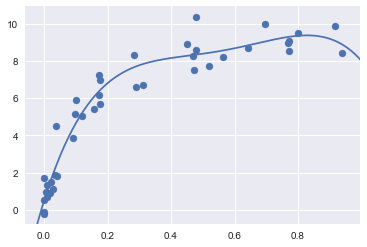

In [24]:
# plot results
plt.scatter(X_grid.ravel(), y_grid)
lim = plt.axis()
y_test = model.fit(X_grid, y_grid).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## Feature engineering

### Categorical data

Use *one hot encoding* technique for representing categorical data.

In [29]:
data = [{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype = int) # set sparse to True for more condensed output
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

In [30]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

### Text features

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_text = vec.fit_transform(sample)
pd.DataFrame(X_text.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


There are some issues with this approach, however: the raw word counts lead to fea‐ tures that put too much weight on words that appear very frequently, and this can be suboptimal in some classification algorithms. One approach to fix this is known as **term frequency–inverse document frequency (TF–IDF)**, which weights the word counts by a measure of how often they appear in the documents. 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X_tfidf = vec.fit_transform(sample)
pd.DataFrame(X_tfidf.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Derived features
The idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods. 

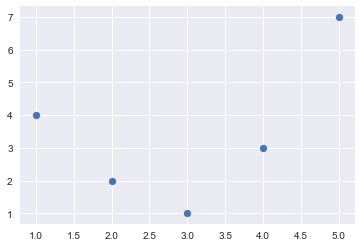

In [40]:
# sample data
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x,y);

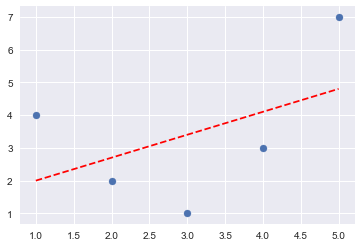

In [48]:
# try linear model with straight line - obviously not a good fit
from sklearn.linear_model import LinearRegression
X = x[:,np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(X,y)
plt.plot(X,yfit,'r--');

It’s clear that we need a more sophisticated model to describe the relationship between x and y. We can do this by transforming the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way:

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = False)
X2 = poly.fit_transform(X)
print(X2)

[[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]]


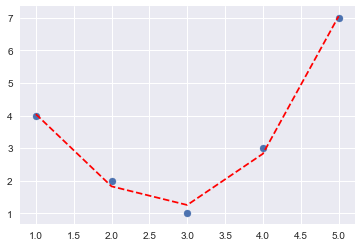

In [53]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit,'r--');

### Imputation of missing data
The sophisticated approaches tend to be very application-specific, and we won’t dive into them here. For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the `Imputer` class.

In [54]:
# sample data
from numpy import nan 
X=np.array([[nan,0, 3],
            [3, 7, 9 ], 
            [3, 5, 2 ], 
            [4, nan,6 ], 
            [8, 8, 1 ]])
y = np.array([14, 16, -1,  8, -5])

In [56]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy = 'mean') # mean is default setting
X_imp = imp.fit_transform(X)
X_imp

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. This imputed data can then be fed directly into, for example, a `LinearRegression` estimator:

In [58]:
model = LinearRegression().fit(X_imp,y)
model.predict(X_imp)

array([ 13.14869292,  14.3784627 ,  -1.15539732,  10.96606197,  -5.33782027])

### Feature pipelines
This pipeline looks and acts like a standard Scikit-Learn object, and will apply all the specified steps to any input data.

In [61]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy = 'mean'), 
                     PolynomialFeatures(degree = 2),
                     LinearRegression())

# use as any other model
model.fit(X,y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


*Notice that for the simplicity of this demonstration, we’ve applied the model to the data it was trained on; this is why it was able to perfectly predict the result.*